In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [51]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [53]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
Date      1149 non-null object
Open      1149 non-null float64
High      1149 non-null float64
Low       1149 non-null float64
Close     1149 non-null float64
Volume    1149 non-null object
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [56]:
trainData

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

In [39]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [40]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

In [41]:
X_train

[array([0.40001392, 0.40665027, 0.38520976, 0.36439577, 0.30063115,
        0.30218582, 0.30872935, 0.31724522, 0.30647856, 0.31478559,
        0.32480973, 0.34021719, 0.21623817, 0.21514758, 0.20452014,
        0.17804437, 0.17481901, 0.20231576, 0.19702525, 0.20261741,
        0.2042881 , 0.21419621, 0.2401615 , 0.269677  , 0.26431687,
        0.2714405 , 0.27517635, 0.26232133, 0.27687024, 0.27123167,
        0.26150919, 0.26373677, 0.25937442, 0.28104696, 0.26703174,
        0.26278541, 0.27155652, 0.27018749, 0.29121032, 0.29088547,
        0.30049193, 0.29782346, 0.28162707, 0.26011695, 0.26438649,
        0.26517542, 0.24923427, 0.26055782, 0.28979488, 0.28564136,
        0.29754502, 0.30659458, 0.32726935, 0.32615556, 0.34116855,
        0.35520698, 0.3472016 , 0.36279469, 0.35745777, 0.37766846]),
 array([0.40665027, 0.38520976, 0.36439577, 0.30063115, 0.30218582,
        0.30872935, 0.31724522, 0.30647856, 0.31478559, 0.32480973,
        0.34021719, 0.21623817, 0.21514758, 0.

In [42]:
y_train

[0.36065992203452746,
 0.344069055132727,
 0.35722572860590307,
 0.3472712084648226,
 0.32998422127343585,
 0.3234406905513274,
 0.3200064971227028,
 0.3107945052905141,
 0.33186374605531843,
 0.36669296454427336,
 0.3055736031186189,
 0.26269259328011874,
 0.27079079264896966,
 0.26589474661221457,
 0.24702988676443272,
 0.23953499164655634,
 0.24308520512344534,
 0.2515778726563951,
 0.2711388527937626,
 0.2844347503248561,
 0.28332095786151834,
 0.2598617041024689,
 0.2589103397067012,
 0.2654538704288101,
 0.27415537404863555,
 0.24164655652496747,
 0.2661267867087431,
 0.27823927974754037,
 0.26981622424354934,
 0.28025802858733995,
 0.2607434564692779,
 0.25791256729162804,
 0.2743642101355115,
 0.31559773528865787,
 0.3019769816224245,
 0.24958232782624834,
 0.28130220902171876,
 0.250510488212363,
 0.27053554854278805,
 0.2571236309634304,
 0.22904677928346007,
 0.2355439019862633,
 0.22141266010766647,
 0.20435771301280847,
 0.18150176350473357,
 0.19911360683126045,
 0.180179

In [43]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [44]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [45]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

2022-04-16 22:02:52.196617: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
35/35 - 8s - loss: 0.0352
Epoch 2/20
35/35 - 4s - loss: 0.0114
Epoch 3/20
35/35 - 3s - loss: 0.0100
Epoch 4/20
35/35 - 3s - loss: 0.0104
Epoch 5/20
35/35 - 3s - loss: 0.0087
Epoch 6/20
35/35 - 3s - loss: 0.0084
Epoch 7/20
35/35 - 3s - loss: 0.0092
Epoch 8/20
35/35 - 3s - loss: 0.0062
Epoch 9/20
35/35 - 3s - loss: 0.0065
Epoch 10/20
35/35 - 3s - loss: 0.0065
Epoch 11/20
35/35 - 3s - loss: 0.0059
Epoch 12/20
35/35 - 3s - loss: 0.0058
Epoch 13/20
35/35 - 3s - loss: 0.0084
Epoch 14/20
35/35 - 3s - loss: 0.0057
Epoch 15/20
35/35 - 4s - loss: 0.0063
Epoch 16/20
35/35 - 4s - loss: 0.0052
Epoch 17/20
35/35 - 4s - loss: 0.0050
Epoch 18/20
35/35 - 4s - loss: 0.0051
Epoch 19/20
35/35 - 3s - loss: 0.0046
Epoch 20/20
35/35 - 3s - loss: 0.0054


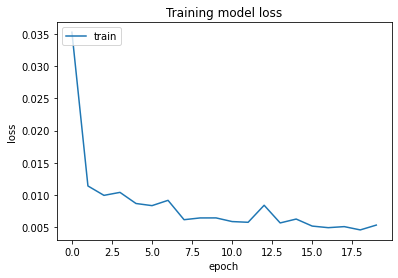

In [46]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [48]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])


In [19]:
X_test

[array([1.72593747, 1.74238903, 1.67806758, 1.65975958, 1.6469277 ,
        1.66272977, 1.64845924, 1.66170864, 1.65718397, 1.69261654,
        1.74173925, 1.71698075, 1.75909609, 1.73547428, 1.68690816,
        1.637739  , 1.61332834, 1.57842942, 1.5630916 , 1.56265086,
        1.59216629, 1.55842757, 1.58745581, 1.58095886, 1.5427187 ,
        1.55471499, 1.57761733, 1.61423333, 1.56601533, 1.58290791,
        1.60908211, 1.59942916, 1.63226289, 1.62954792, 1.63381766,
        1.64495541, 1.65154527, 1.57088811, 1.54573505, 1.52629008,
        1.50273795, 1.36908291, 1.36467409, 1.43604965, 1.394677  ,
        1.46203831, 1.44906706, 1.38474562, 1.4044458 , 1.41535185,
        1.42122225, 1.29828745, 1.40238061, 1.346459  , 1.2272137 ,
        1.26464164, 1.35875724, 1.34304808, 1.31471607, 1.27364481]),
 array([1.74238903, 1.67806758, 1.65975958, 1.6469277 , 1.66272977,
        1.64845924, 1.66170864, 1.65718397, 1.69261654, 1.74173925,
        1.71698075, 1.75909609, 1.73547428, 1.

In [49]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [22]:
y_pred = model.predict(X_test)
y_pred

array([[1.1424296],
       [1.1465217],
       [1.1572139],
       [1.1733279],
       [1.1880559],
       [1.1920923],
       [1.1835002],
       [1.1675702],
       [1.1541371],
       [1.1474153],
       [1.1399958],
       [1.1298018],
       [1.1200901],
       [1.1110346],
       [1.1076287],
       [1.1104407],
       [1.1250623],
       [1.1503007],
       [1.1813153],
       [1.213623 ],
       [1.2317233],
       [1.2339509],
       [1.218541 ],
       [1.1914827],
       [1.1632557],
       [1.1432027],
       [1.1342293],
       [1.1313128],
       [1.1258788],
       [1.1176238],
       [1.1077137],
       [1.0959325],
       [1.0785675],
       [1.0563971],
       [1.0441808],
       [1.048641 ],
       [1.0665227],
       [1.0904604],
       [1.115227 ],
       [1.1313155],
       [1.1450797],
       [1.1593564],
       [1.1750711],
       [1.1901109],
       [1.2011288],
       [1.2040542],
       [1.1965561],
       [1.1870283],
       [1.1815162],
       [1.1832635],


In [15]:
predicted_price = sc.inverse_transform(y_pred)

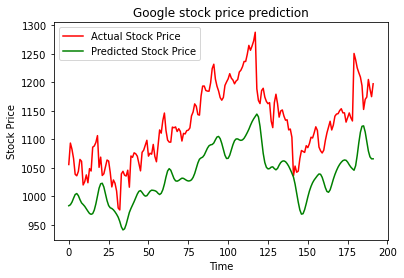

In [16]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()